# 1. Math Drills

Give an example of a binary relation on a set which is

1. Reflexive and symmetric, but not transitive  
2. Reflexive, but neither symmetric nor transitive  
3. Symmetric, but neither reflexive nor transitive  
4. Transitive, but neither reflexive nor symmetric  

Recall the definitions from the lectures if you need to!

In [141]:
R1={(1,1),(2,2),(3,3),(1,2),(2,1),(2,3)}
R2={(1,2),(2,3),(1,3)}
R3={(1,2),(2,1)}
R4={(1,2),(2,3),(1,3)}

# Exercise 2: A bunch of Math!

## Polynomial

Consider the polynomial

$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i \tag{1}
$$

Write a function `p` such that `p(x, coeff)` that computes the value in given a point `x` and a list of coefficients `coeff`.

```
p(5, [1, 1]) = 1 + 5 = 6
p(5, [2, 1, 1]) = 2 + 5 + 25 = 32
```

In [13]:
def eval_polynomial(x, P):
    '''
    Compute polynomial P(x) where P is a vector of coefficients, highest
    order coefficient at P[0].  Uses Horner's Method.
    '''
    result = 0
    for coeff in P:
        result = x * result + coeff
    return result

print(eval_polynomial(5, [1, 1]))

6


# Variance

Define a function named `var` that takes a list of numbers and computes the variance. The variance is:

$$variance(x) = \frac{∑_i^N(x_i − average(x))^2}{N-1}$$

Don't cheat and use `numpy.var`! You should only use that function to test that your function is correct

In [21]:
   def variance(val):
       total_sum=sum(val)
       average=total_sum/len(val)
       a=[]
       for i in val:
           a.append((i-average)**2)
       return sum(a)/len(a)

   val=[2, 3, 4, 2, 3, 8, 5, 7, 6, 46, 1, 2, 27]
   variance(val)

156.22485207100596

In [20]:
import numpy as np 
val=[2, 3, 4, 2, 3, 8, 5, 7, 6, 46, 1, 2, 27]
variance = np.var(val)
variance

156.22485207100593

# RMSE

Calculate the root mean squared error (RMSE) of a machine learning model's output. The function takes in two lists: one with actual values, one with predictions. The formula for RMSE is:

$$RMSE(y_1, y_2) = \sqrt{\dfrac{1}{N} \sum_{i=1}^N (y_{1i} - y_{2i})^2}$$

```
    rmse([1, 2], [1, 2]) = 0
    rmse([1, 2, 3], [3, 2, 1]) = 1.63
```

You can use 

```
sklearn.metrics.mean_squared_error(y_actual, y_predicted, squared=False)
```

To test your function

In [39]:
import numpy as np 

def rmse_test(predictions, target):
    return np.sqrt(((np.array(predictions) - np.array(target)) ** 2).mean())

print(rmse_test([1, 2], [1, 2]))
print(rmse_test([1, 2, 3], [3, 2, 1]))

0.0
1.632993161855452


In [33]:
from sklearn.metrics import mean_squared_error

mean_squared_error([1, 2, 3], [3, 2, 1], squared=False)

1.632993161855452

# Jaccard Similarity

The Jaccard similarity between two sets is the size of intersection divided by the size of union. Write a function that computes it:

$$jaccard(A, B) = \dfrac{|A \cap B|}{|A \cup B|}$$


```
jaccard({'a', 'b', 'c'}, {'a', 'd'}) = 1 / 4
```



In [44]:
from fractions import Fraction
def jaccard_similarity(list1, list2):
    set_1 = set(list1)
    set_2 = set(list2)
    return Fraction(len(set_1.intersection(set_2)) / len(set_1.union(set_2)))

print(jaccard_similarity({'a', 'b', 'c'}, {'a', 'd'}))

1/4


# Exercise 3

First, write a function that returns one realization of the following random device

1. Flip an unbiased coin 10 times.  
1. If a head occurs `k` or more times consecutively within this sequence at least once, pay one dollar.  
1. If not, pay nothing.  


Second, write another function that does the same task except that the second rule of the above random device becomes

- If a head occurs `k` or more times within this sequence, pay one dollar.  


Use no import besides `from numpy.random import uniform`.

In [174]:
import random
def flip():
    return ["H" if random.randint(0,3) <= 2 else "T" for i in range(10)]
print(flip())

def k_test(k):
    w = 'H'
    list_1 = flip()
    vList = [w] * k
    for i in range(len(list_1) - k):
        if list_1[i:i + k] >= vList:
            print("Big winner")
            break
        else:
            print("Try Again")
        
print(k_test(2))

['H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'T']
Big winner
None


# Exercise 4: Logistic Map fixed point

The **Logistic Map** is a famous function from Chaos Theory which is defined as:

$$x_{t+1} = r \cdot x_t(1−x_t)$$

with the conditions:

$$x_0 ∈ [0,1], r ∈[0,4]$$

Write a lambda $f = logistic(x, r)$, that's successively applied to itself $n$ times through a second function `logistic_n_times(x0, f, r, n)` with the inital point $X_0$

Make a few runs of this for various values of `x0` and `r`. Answer the following:

- Can you find a fixed point? 

- At what values of `r` are there fixed points? 

- Are there any ranges of input for which the function is an attractor?

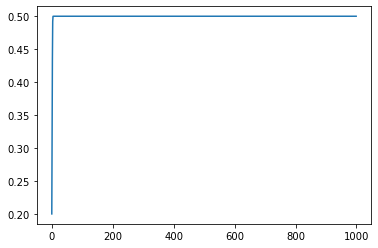

In [8]:
import math
from random import randint
logisticmap = lambda x,r: r * x * (1 - x)
def iterate(x0, r, n):
    x = x0
    lst = []
    for i in range(n):
        lst.append(x)
        x = logisticmap(x, r)
    return lst 

graph = plt.plot(iterate(0.2, 2, 1000))


# Exercise 5 (stretch): Famous Chaos Theory Plot 

There is a famous plot in chaos theory of the logistic map that relates values of the attractors in $x_t$ for values of $r$, detailing where the function tends to "end up" for each value of $r$.

<img src="logistic map.png" style="width: 400px;">

Reproduce this plot using the `matplotlib` package.

**Hint:** Produce samples from the function to fill arrays on the x and y axis!

**Hint:** Take the final 50 values in a series of data points produced by the function!

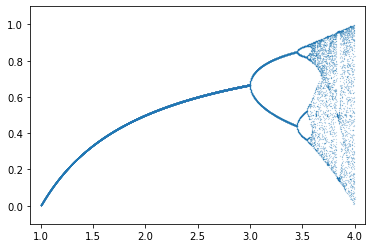

In [207]:
import math
from random import randint
import matplotlib.pyplot as plt
import numpy as np

logistic = lambda x,r: r * x * (1 - x)

iter = 1000         # Number of iterations per point
seed = 0.5          # Seed value for x in (0, 1)
spacing = .0001     # Spacing between points on domain (r-axis)
res = 8             # Largest n-cycle visible

# Initialize r and x lists
rlist = []
xlist = []

def iterate(n, x, r):
    for i in range(1,n):
        x = logisticmap(x, r)
    return x 

# Generate list values -- iterate for each value of r
for r in [i * spacing for i in range(int(1/spacing),int(4/spacing))]:
   rlist.append(r) 
   xlist.append(iterate(randint(iter-res/2,iter+res/2), seed, r))

scatter(rlist, xlist, s = .01)
xlim(0.9, 4.1)
ylim(-0.1,1.1)
plt.show()